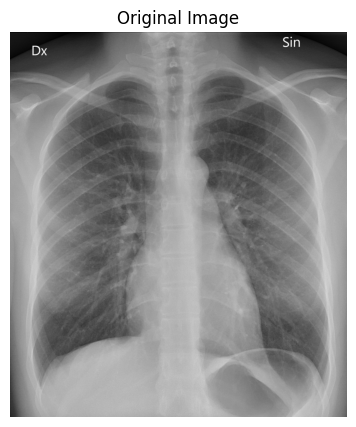

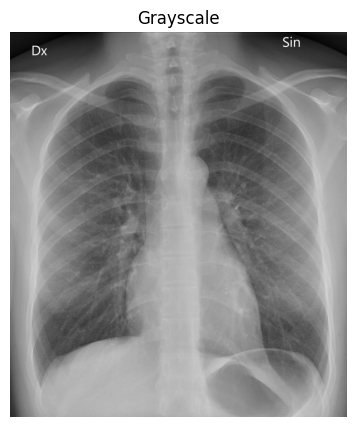

/tmp/ipython-input-1681516196.py:26: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])


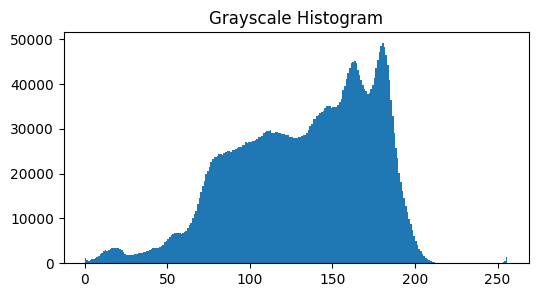

Resized shape: (256, 256)


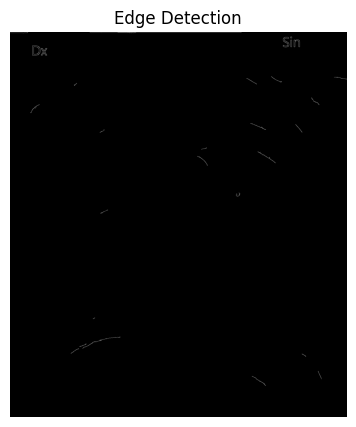

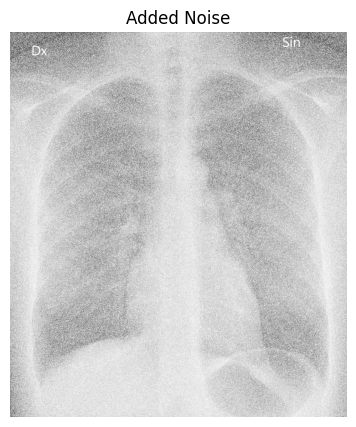

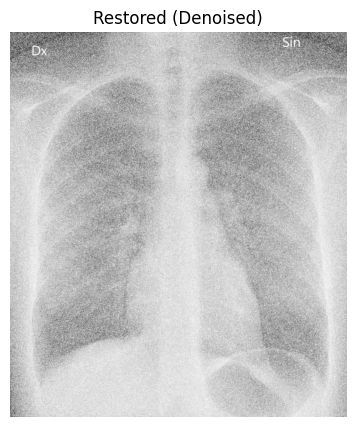

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = 'https://upload.wikimedia.org/wikipedia/commons/a/a1/Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg'
req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
resp = urllib.request.urlopen(req)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

def show(title, img, cmap=None):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

show("Original Image", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show("Grayscale", gray, cmap='gray')

plt.figure(figsize=(6, 3))
plt.title("Grayscale Histogram")
plt.hist(gray.ravel(), 256, [0, 256])
plt.show()

resized = cv2.resize(gray, (256, 256))
print(f"Resized shape: {resized.shape}")

edges = cv2.Canny(gray, 50, 150)
show("Edge Detection", edges, cmap='gray')

noise = np.random.normal(0, 25, gray.shape).astype('uint8')
noisy_img = cv2.add(gray, noise)
show("Added Noise", noisy_img, cmap='gray')

denoised = cv2.GaussianBlur(noisy_img, (5, 5), 0)
show("Restored (Denoised)", denoised, cmap='gray')
